# <font color = aquamarine> Pandas
<font color = azure>

<div style = "text-align : left"> Pandas is an open source, BSD-licensed library providing high-performance, easy-to-use data structures and data analysis tools for the Python programming language.
</div> 

<font color = aquamarine>

**Documentation**: 
 - **Pandas**: https://pandas.pydata.org/docs/
 - **Python**: https://docs.python.org/3/library/index.html

### <font color = Azure> Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sqlalchemy import create_engine, MetaData, Table, inspect # Import the necessary modules to use SQL
np.random.seed(123)

### <font color = Azure> Working with JSON

In [2]:
names_f = pd.read_json('https://guilhermeonrails.github.io/nomes_ibge/nomes-f.json')
names_m = pd.read_json('https://guilhermeonrails.github.io/nomes_ibge/nomes-m.json')

In [3]:
names_f.sample(5)

,nome,regiao,freq,rank,sexo
50,RAFAELA,0,272718,51,F
127,TAINA,0,127613,128,F
37,ROSANGELA,0,310226,38,F
149,CICERA,0,108197,150,F
19,MARIANA,0,381778,20,F


In [4]:
names_m.sample(5)

,nome,regiao,freq,rank,sexo
187,ELTON,0,71566,188,M
173,JAILSON,0,75076,174,M
134,ALBERTO,0,108018,135,M
147,ALISSON,0,94270,148,M
57,IGOR,0,264732,58,M


In [5]:
frames = [names_f, names_m]
df = pd.concat(frames)['nome'].to_frame()

In [6]:
df["id_aluno"] = np.random.permutation(len(df))+1

In [7]:
print(f'Amount of names: {len(df)}')
print(f'Highest generate id: {df["id_aluno"].max()}')
print(f'Lowest generate id: {df["id_aluno"].min()}')

Amount of names: 400
Highest generate id: 400
Lowest generate id: 1


In [8]:
df.shape

(400, 2)

In [9]:
domains = ['@domain.com.br', '@gmail.com']
df['dominio'] = np.random.choice(domains, len(df))

In [10]:
df['email'] = df['nome'].str.lower() + df['dominio']
df.sample(5)

,nome,id_aluno,dominio,email
84,SEVERINO,382,@domain.com.br,severino@domain.com.br
0,JOSE,323,@gmail.com,jose@gmail.com
179,IAGO,141,@domain.com.br,iago@domain.com.br
10,SANDRA,237,@domain.com.br,sandra@domain.com.br
171,TERESINHA,316,@domain.com.br,teresinha@domain.com.br


### <font color = Azure> Working with HTML

In [11]:
url = 'http://tabela-cursos.herokuapp.com/index.html'
courses = pd.read_html(url)
courses = courses[0]
courses.head()

,Nome do curso
0,Lógica de programação
1,Java para Web
2,C# para Web
3,Ruby on Rails
4,Cursos de Python


In [12]:
courses.rename(columns={'Nome do curso' : 'Nome_do_curso'}, inplace=True)
courses.head()

,Nome_do_curso
0,Lógica de programação
1,Java para Web
2,C# para Web
3,Ruby on Rails
4,Cursos de Python


In [13]:
courses['id'] = courses.index + 1
courses.set_index('id', inplace=True)
courses.tail()

,Nome_do_curso
id,
16,Estatística básica
17,Internet das coisas
18,Programação funcional
19,Boas práticas em Java
20,Orientação objetos com Java


In [14]:
df['matricula'] = np.ceil(np.random.exponential(size=len(df))*1.5).astype(int)
df.matricula.describe()

count    400.000000
mean       2.017500
std        1.422058
min        1.000000
25%        1.000000
50%        1.500000
75%        3.000000
max        9.000000
Name: matricula, dtype: float64

C:\Users\renat\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='matricula', ylabel='Density'>

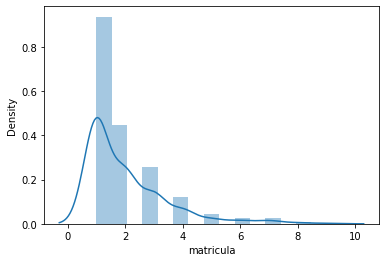

In [15]:
sns.distplot(df.matricula)

In [16]:
df.head()

,nome,id_aluno,dominio,email,matricula
0,MARIA,219,@domain.com.br,maria@domain.com.br,1
1,ANA,56,@gmail.com,ana@gmail.com,2
2,FRANCISCA,146,@gmail.com,francisca@gmail.com,1
3,ANTONIA,216,@domain.com.br,antonia@domain.com.br,1
4,ADRIANA,377,@gmail.com,adriana@gmail.com,3


In [17]:
df.matricula.value_counts()

1    200
2     95
3     55
4     26
5      9
7      6
6      6
8      2
9      1
Name: matricula, dtype: int64

In [18]:
all_matriculas = []
x = np.random.rand(20)
prob = x / x.sum()
for index, row in df.iterrows():
    id = row.id_aluno
    matricula = row.matricula
    for i in range(matricula):
        mat = [id, np.random.choice(courses.index, p=prob)]
        all_matriculas.append(mat)

matriculas = pd.DataFrame(all_matriculas, columns=['id_aluno','id_curso'])
matriculas.head()

,id_aluno,id_curso
0,219,13
1,56,4
2,56,4
3,146,4
4,216,10


In [19]:
mat_courses = matriculas.groupby('id_curso').count().join(courses['Nome_do_curso']).rename(columns={'id_aluno':'quantidade_de_alunos'})
mat_courses.head()

,quantidade_de_alunos,Nome_do_curso
id_curso,,
1,52,Lógica de programação
2,34,Java para Web
3,67,C# para Web
4,94,Ruby on Rails
5,10,Cursos de Python


In [20]:
#Exporting data
#CSV
# .to_csv()
#HTML
# .to_html()
#JSON
# .to_json()

### <font color = Azure> Working with SQL

In [21]:
engine = create_engine('sqlite:///:memory:')
engine
print(type(engine))

mat_courses.to_sql('matriculas', engine)

inspector = inspect(engine) # criando um Inspector object
print(inspector.get_table_names()) # Exibindo as tabelas com o inspecto

<class 'sqlalchemy.engine.base.Engine'>
['matriculas']


In [24]:
#Searching
query = 'SELECT * FROM matriculas where quantidade_de_alunos < 20'
pd.read_sql(query, engine)

,id_curso,quantidade_de_alunos,Nome_do_curso
0,5,10,Cursos de Python
1,7,5,.NET para web
2,8,10,Novas integrações com Java
3,9,14,TDD com Java
4,16,5,Estatística básica
5,18,17,Programação funcional


In [29]:
all_table = pd.read_sql_table('matriculas', engine, columns = ['Nome_do_curso', 'quantidade_de_alunos'])
all_table.head()

,Nome_do_curso,quantidade_de_alunos
0,Lógica de programação,52
1,Java para Web,34
2,C# para Web,67
3,Ruby on Rails,94
4,Cursos de Python,10


In [30]:
all_table.query('quantidade_de_alunos > 50')

,Nome_do_curso,quantidade_de_alunos
0,Lógica de programação,52
2,C# para Web,67
3,Ruby on Rails,94
10,Preparatório para certificação Java,79
13,Desenvolvendo jogos,67
14,Análise de dados,67
19,Orientação objetos com Java,82


In [31]:
#Writing
all_table.to_sql('all_table', con=engine)

20

In [33]:
inspector = inspect(engine) # criando um Inspector object
print(inspector.get_table_names()) # Exibindo as tabelas com o inspecto

['all_table', 'matriculas']


### <font color = Azure> Working with Excel

In [34]:
mat_courses.head()

,quantidade_de_alunos,Nome_do_curso
id_curso,,
1,52,Lógica de programação
2,34,Java para Web
3,67,C# para Web
4,94,Ruby on Rails
5,10,Cursos de Python


In [36]:
matriculas.head()

,id_aluno,id_curso
0,219,13
1,56,4
2,56,4
3,146,4
4,216,10


In [39]:
id_curso = 3
next_class = matriculas.query('id_curso == {}'.format(id_curso))
next_class.head()

,id_aluno,id_curso
5,377,3
8,148,3
20,165,3
34,256,3
39,163,3


In [40]:
df.sample(3)

,nome,id_aluno,dominio,email,matricula
138,CLEBER,19,@domain.com.br,cleber@domain.com.br,3
10,SANDRA,237,@domain.com.br,sandra@domain.com.br,1
29,TIAGO,361,@domain.com.br,tiago@domain.com.br,1


In [51]:
next_class = next_class.set_index('id_aluno').join(df.set_index('id_aluno'))['nome'].to_frame().drop_duplicates()
next_class.head()

,nome
id_aluno,
6,SILVANA
8,EUNICE
30,JAIME
36,JANAINA
38,LIDIA


In [52]:
course_name = courses.loc[id_curso]
course_name

Nome_do_curso    C# para Web
Name: 3, dtype: object

In [53]:
course_name = course_name.Nome_do_curso
course_name

'C# para Web'

In [56]:
next_class.rename(columns={'nome':'Alunos do curso de {}'.format(course_name)}, inplace=True)
next_class.head()

,Alunos do curso de C# para Web
id_aluno,
6,SILVANA
8,EUNICE
30,JAIME
36,JANAINA
38,LIDIA


In [58]:
#Exporting data to excel
next_class.to_excel('next_class.xlsx', index = False)